In [206]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import json
import yaml
import pathlib
import imageio
from IPython.display import Image


# Load Info

In [200]:
def get_info(url):
    with open(url, 'r') as f: 
        data = yaml.safe_load(f)
        len_sub_img = len(data['TextureImporter']['fileIDToRecycleName'])
        if (len_sub_img != 0):
            width = data['TextureImporter']['spriteSheet']['sprites'][0]['rect']['width']
            height = data['TextureImporter']['spriteSheet']['sprites'][0]['rect']['height']
        else:
            width = 0
            height= 0
        return len_sub_img, width, height
    
def show(tup):
    src, info = tup
    plt.figure()
    plt.imshow(src);plt.axis('off')
    plt.title(f'Sub: N:{info[0]} W:{info[1]} H:{info[2]}')
    
def get_sub_imgs(tup):
    src, info = tup
    if info[0] <= 1: return [src]
    height, width, *_ = src.shape
    sub_list = []
    counter = 0
    
    for idy in range(height//info[2]):
        for idx in range(width//info[1]):
    
            sub_list.append(src[idy*info[2]:(idy+1)*info[2], idx*info[1]:(idx+1)*info[1]])
            counter += 1
            if counter >= info[0]:
                break
    return sub_list

In [201]:
list_of_pngs = glob.glob("../Platform/Assets/UTech/MG-Platformer/BasicAssets/Character/Sprites/*.png")
list_of_pngs = [(cv2.imread(png), get_info(png+'.meta')) for png in (list_of_pngs)]

In [202]:
idx  = 1
subs = get_sub_imgs(list_of_pngs[idx])

In [203]:
save_path = 'gifs'
pathlib.Path(save_path).mkdir(exist_ok=True)

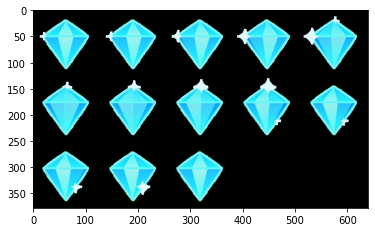

In [204]:
plt.imshow(list_of_pngs[1][0])

In [205]:
imageio.mimsave(save_path+f'/{idx}.gif', subs)

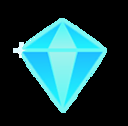

In [207]:
with open('gifs/1.gif','rb') as f:
    display(Image(data=f.read(), format='png'))